In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

filename_patient = Path('..') / 'data' / 'patient.csv'
filename_station = Path('..') / 'data' / 'station.csv'
filename_observation = Path('..') / 'data' / 'observation.csv'

if not filename_patient.exists():
    raise FileNotFoundError(f'File patient.csv is not found')

if not filename_station.exists():
    raise FileNotFoundError(f'File station.csv is not found')

if not filename_observation.exists():
    raise FileNotFoundError(f'File observation.csv is not found')

patient_df = pd.read_csv(filename_patient, sep='\t')

observation_df = pd.read_csv(filename_observation, sep='\t')

station_df = pd.read_csv(filename_station, sep='\t')

# EDA with visualization

# patient

In [2]:
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,Zänkerweg 6-2\r\n75317 Pößneck,NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51\r\nPiratininga\r\n99...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike\r\nLake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run\r\nWest Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [3]:
patient_df.shape

(2154, 13)

In [4]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blood_group       2154 non-null   object 
 1   user_id           2154 non-null   int64  
 2   company           2154 non-null   object 
 3   registration      2154 non-null   object 
 4   address           1831 non-null   object 
 5   job               646 non-null    object 
 6   ssn               2154 non-null   object 
 7   username          2154 non-null   object 
 8   residence         0 non-null      float64
 9   name              2154 non-null   object 
 10  current_location  2046 non-null   object 
 11  mail              2154 non-null   object 
 12  station_ID        2154 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 218.9+ KB


In [5]:
patient_df.describe()

,user_id,residence,station_ID
count,2154.000000,0.0,2154.000000
mean,1073.106778,NaN,368.611421
std,626.165384,NaN,213.766990
min,0.000000,NaN,0.000000
25%,532.250000,NaN,178.250000
50%,1072.500000,NaN,361.000000
75%,1608.500000,NaN,549.000000
max,2153.000000,NaN,745.000000


In [6]:
patient_df.isna().sum().sort_values(ascending=False)

residence           2154
job                 1508
address              323
current_location     108
blood_group            0
registration           0
company                0
user_id                0
ssn                    0
username               0
name                   0
mail                   0
station_ID             0
dtype: int64

In [7]:
patient_df.nunique().sort_values(ascending=False)

ssn                 2154
mail                2149
username            2130
name                2099
current_location    2046
company             1956
registration        1949
address             1831
user_id             1360
station_ID           696
job                  390
blood_group            8
residence              0
dtype: int64

In [8]:
patient_df['blood_group'].unique()

array(['B-', 'O+', 'B+', 'A+', 'A-', 'AB-', 'AB+', 'O-'], dtype=object)

In [9]:
patient_df.groupby('blood_group').size()

blood_group
A+     254
A-     299
AB+    268
AB-    277
B+     256
B-     260
O+     269
O-     271
dtype: int64

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'residence'}>],
       [<Axes: title={'center': 'station_ID'}>, <Axes: >]], dtype=object)

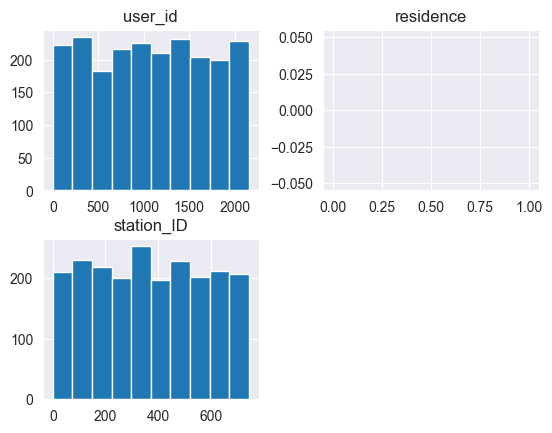

In [10]:
patient_df.hist()

# station

In [11]:
station_df.head()

,station,longitude,location,QoS,latitude,revision
0,Kenda,86.51499,Asia/Kolkata,good,23.19590,17 Jun 2018
1,Canton,-83.48216,America/Detroit,good,42.30865,2022/10/10
2,Zaysan,84.87144,Asia/Almaty,good,47.46657,2016/11/06
3,Shushary,30.38167,Europe/Moscow,good,59.80917,2022/09/10
4,Cheraga,2.95924,Africa/Algiers,good,36.76775,07 Jan 2024


In [12]:
station_df.shape

(746, 6)

In [13]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    746 non-null    object 
 1   longitude  746 non-null    float64
 2   location   746 non-null    object 
 3   QoS        746 non-null    object 
 4   latitude   746 non-null    float64
 5   revision   746 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.1+ KB


In [14]:
station_df.describe()

,longitude,latitude
count,746.000000,746.000000
mean,5.941826,28.956844
std,72.705721,23.569270
min,-123.026210,-54.800000
25%,-68.057805,16.455000
50%,8.818865,36.211865
75%,65.450023,45.499673
max,178.004170,68.798330


In [15]:
station_df.isna().sum().sort_values(ascending=False)

station      0
longitude    0
location     0
QoS          0
latitude     0
revision     0
dtype: int64

In [16]:
station_df.nunique().sort_values(ascending=False)

revision     727
station      520
longitude    520
latitude     520
location     139
QoS            4
dtype: int64

In [17]:
station_df['QoS'].unique()

array(['good', 'acceptable', 'excellent', 'maintenance'], dtype=object)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>]], dtype=object)

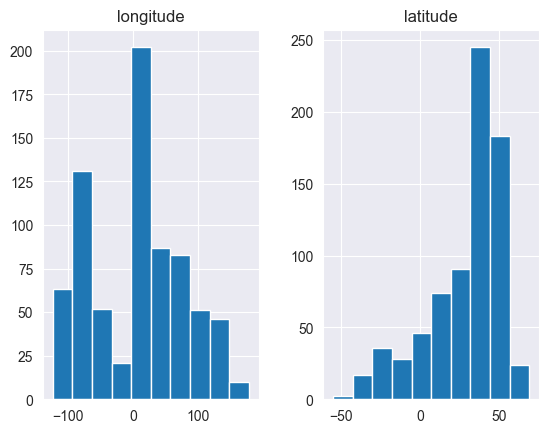

In [18]:
station_df.hist()

# observation

In [19]:
observation_df.head()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
0,96.491498,75.410035,11.966950,14.781380,38.814201,60.447244,130.452955,94.990567,34.465008,8.254118,...,4.000203,80.401412,36.370500,51.040438,27.830965,0.286386,26.305034,1.0,6.84019,79.87116
1,97.657620,90.314511,9.500074,16.118786,42.528828,60.183638,106.651627,107.891610,37.058675,9.514584,...,4.073080,63.098636,26.194633,50.549199,51.169605,0.257752,28.282578,1.0,-29.29750,-51.50361
2,96.528162,79.127147,11.268005,15.921648,41.262696,77.600291,131.520657,109.497981,36.934570,10.435298,...,4.000805,47.467045,47.915005,44.390213,45.069050,0.255257,34.529833,1.0,9.33370,122.86370
3,98.195660,83.015909,14.140633,14.348950,40.283494,59.027420,144.702141,101.915115,34.855279,8.896198,...,4.003649,36.139538,51.788271,55.517932,29.478669,0.255097,36.136759,1.0,33.54428,-84.23381
4,97.573527,83.388999,9.058458,17.513347,39.844401,49.965222,111.977370,98.441554,36.833986,7.009457,...,4.004251,47.409300,86.559604,40.041646,53.128176,0.286358,23.648813,1.0,50.80019,7.20769


In [20]:
observation_df.shape

(12133, 23)

In [21]:
observation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12133 entries, 0 to 12132
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12133 non-null  float64
 1   HR                     12133 non-null  float64
 2   PI                     12133 non-null  float64
 3   RR                     12133 non-null  float64
 4   EtCO₂                  12133 non-null  float64
 5   FiO₂                   12133 non-null  float64
 6   PRV                    12133 non-null  float64
 7   BP                     12133 non-null  float64
 8   Skin Temperature       12133 non-null  float64
 9   Motion/Activity index  12133 non-null  float64
 10  PVI                    12133 non-null  float64
 11  Hb level               12133 non-null  float64
 12  SV                     12133 non-null  float64
 13  CO                     12133 non-null  float64
 14  Blood Flow Index       12133 non-null  float64
 15  PP

In [22]:
observation_df.describe()

,SpO₂,HR,PI,RR,EtCO₂,FiO₂,PRV,BP,Skin Temperature,Motion/Activity index,...,CO,Blood Flow Index,PPG waveform features,Signal Quality Index,Respiratory effort,O₂ extraction ratio,SNR,oximetry,latitude,longitude
count,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,...,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000,12133.000000
mean,97.409019,83.114699,9.734597,16.137013,40.556298,59.457167,116.650960,103.600513,35.711715,10.085522,...,4.036754,51.869686,50.355038,49.713851,49.096870,0.249540,29.977247,0.596472,28.978655,6.119119
std,0.740892,5.573951,2.698232,1.032176,1.269783,10.767989,29.860181,3.591584,0.605758,1.441347,...,0.139381,12.231608,12.282171,12.949734,12.763442,0.028898,5.759219,0.490625,23.532252,72.653597
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,20.000000,90.000000,33.000000,4.596843,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.200000,20.000000,0.000000,-54.800000,-123.026210
25%,96.834760,78.810257,7.917530,15.452009,39.722449,52.246367,94.306159,101.190550,35.306966,9.135083,...,4.000704,43.553167,41.981568,40.927906,40.507353,0.224546,24.977873,0.000000,16.455000,-68.300000
50%,97.315208,82.950379,9.704334,16.138621,40.605869,59.506589,121.038850,103.589050,35.711292,10.071304,...,4.003555,51.951194,50.397988,49.618836,49.267523,0.249141,30.062375,1.000000,36.215440,8.867040
75%,98.031972,87.429912,11.564319,16.830714,41.417182,66.658016,139.611881,106.009289,36.111692,11.034590,...,4.022252,60.078158,58.768481,58.501520,57.786931,0.274581,34.934766,1.000000,45.516670,65.509170
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,200.000000,120.000000,38.000000,16.168825,...,8.000000,100.000000,100.000000,100.000000,100.000000,0.300000,40.000000,1.000000,68.798330,178.004170


In [23]:
observation_df.isna().sum().sort_values(ascending=False)

SpO₂                     0
HR                       0
PI                       0
RR                       0
EtCO₂                    0
FiO₂                     0
PRV                      0
BP                       0
Skin Temperature         0
Motion/Activity index    0
PVI                      0
Hb level                 0
SV                       0
CO                       0
Blood Flow Index         0
PPG waveform features    0
Signal Quality Index     0
Respiratory effort       0
O₂ extraction ratio      0
SNR                      0
oximetry                 0
latitude                 0
longitude                0
dtype: int64

In [24]:
observation_df.nunique().sort_values(ascending=False)

SpO₂                     11954
HR                       11954
PI                       11954
RR                       11954
EtCO₂                    11954
FiO₂                     11954
PRV                      11954
BP                       11954
Skin Temperature         11954
Motion/Activity index    11954
PVI                      11954
Hb level                 11954
SV                       11954
CO                       11954
Blood Flow Index         11954
PPG waveform features    11954
Signal Quality Index     11954
Respiratory effort       11954
O₂ extraction ratio      11954
SNR                      11954
latitude                   520
longitude                  520
oximetry                     2
dtype: int64

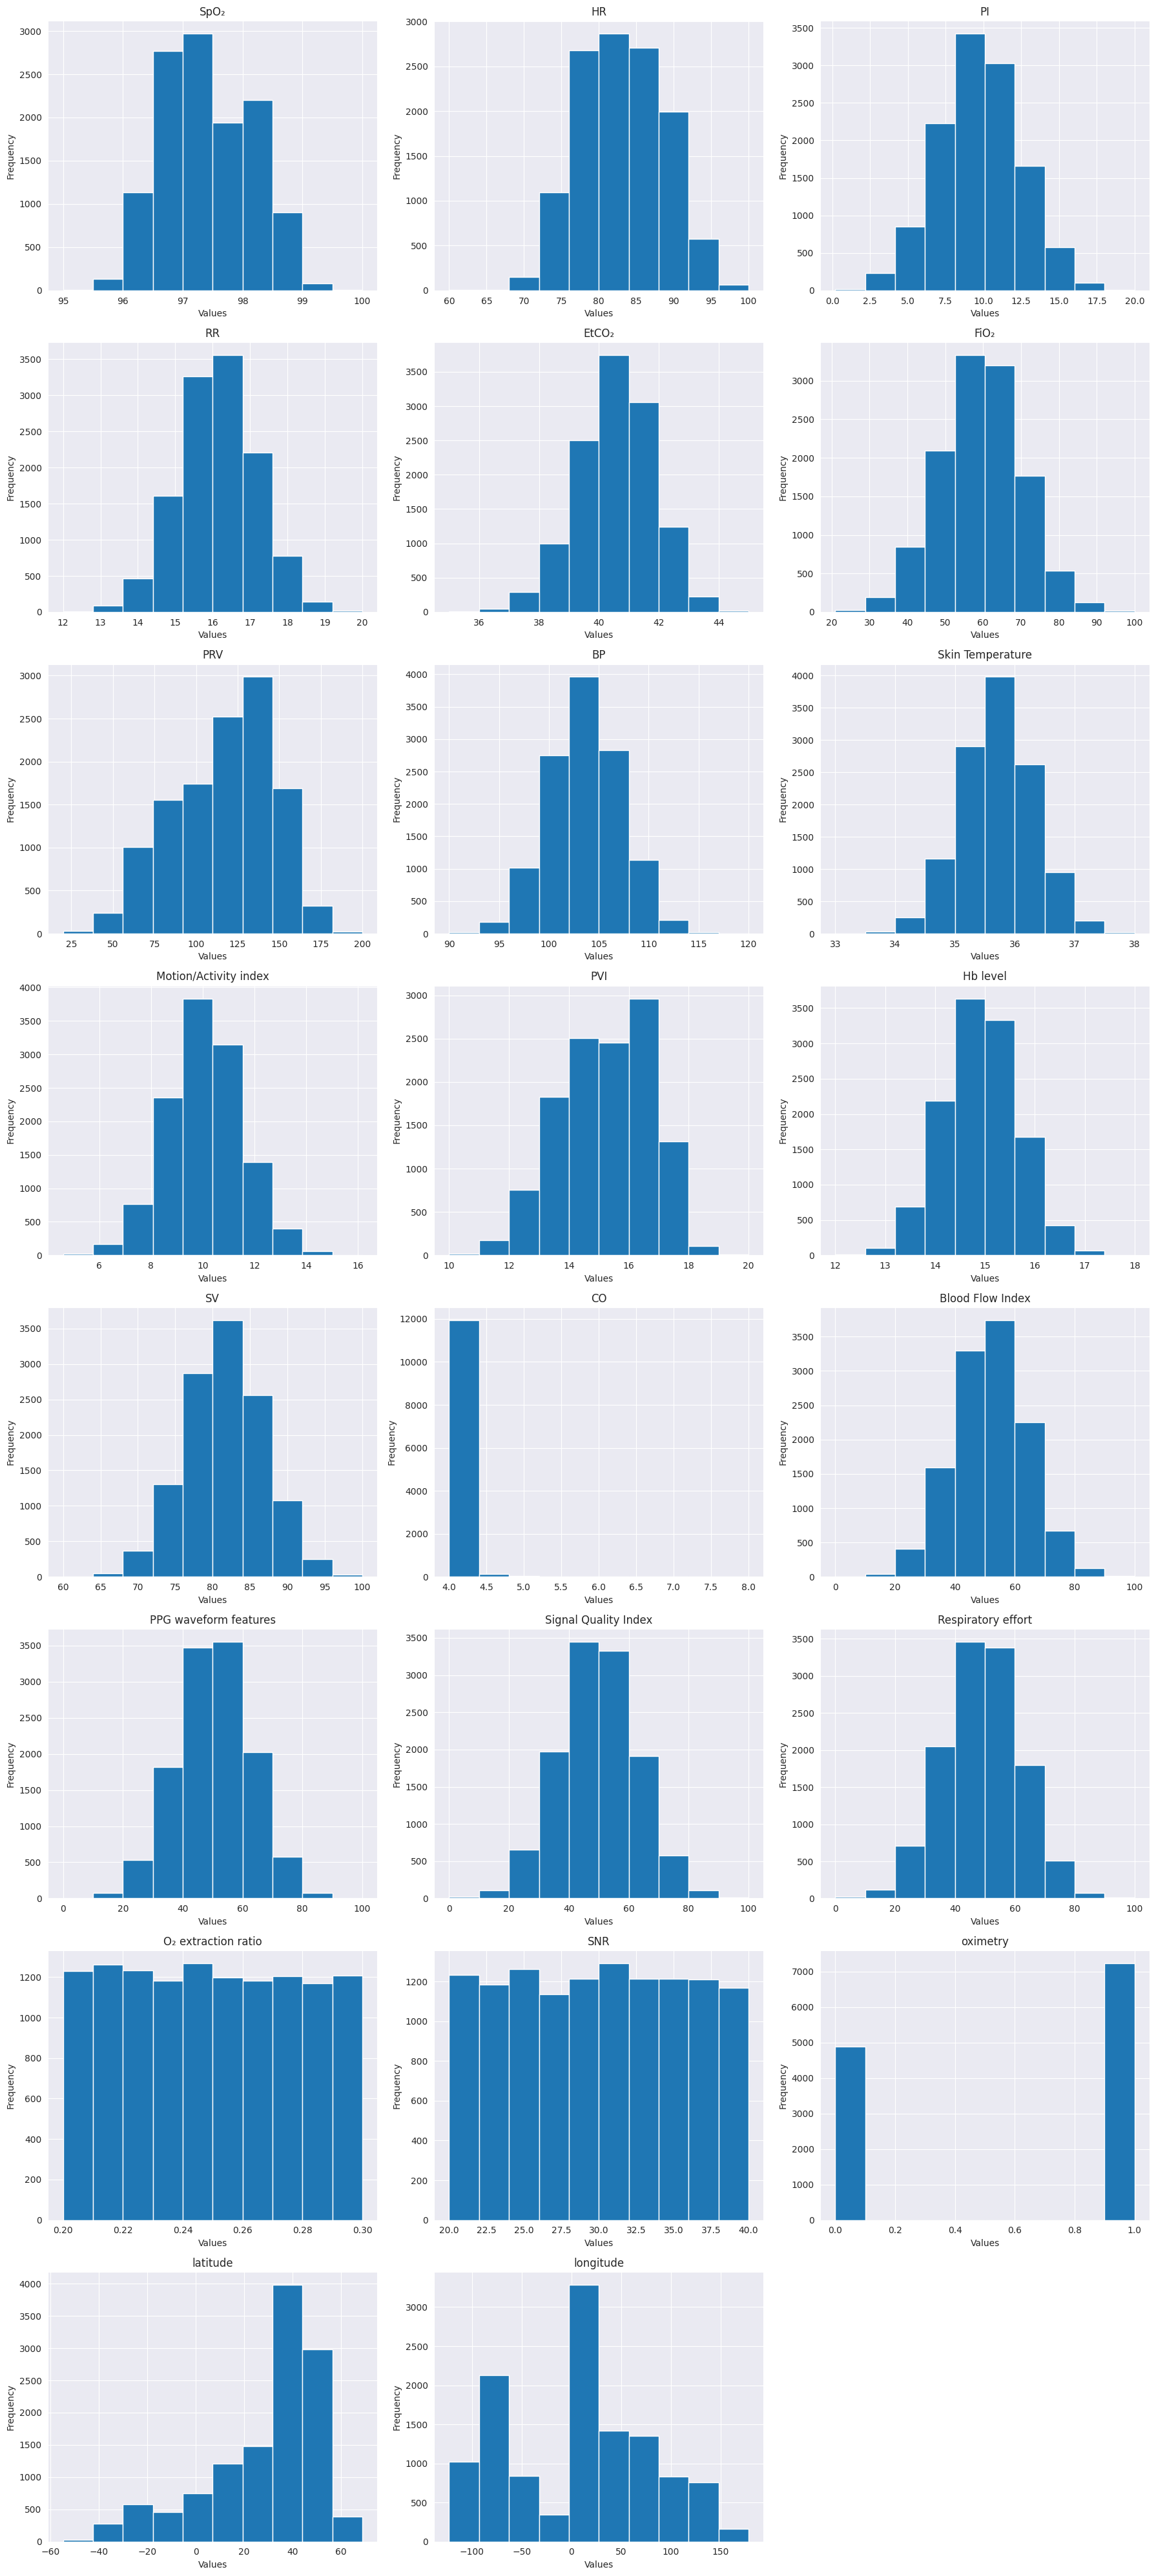

In [25]:
plt.rcParams['font.family'] = 'DejaVu Sans'
numeric_cols = observation_df.select_dtypes(include='number').columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    observation_df[col].hist(ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


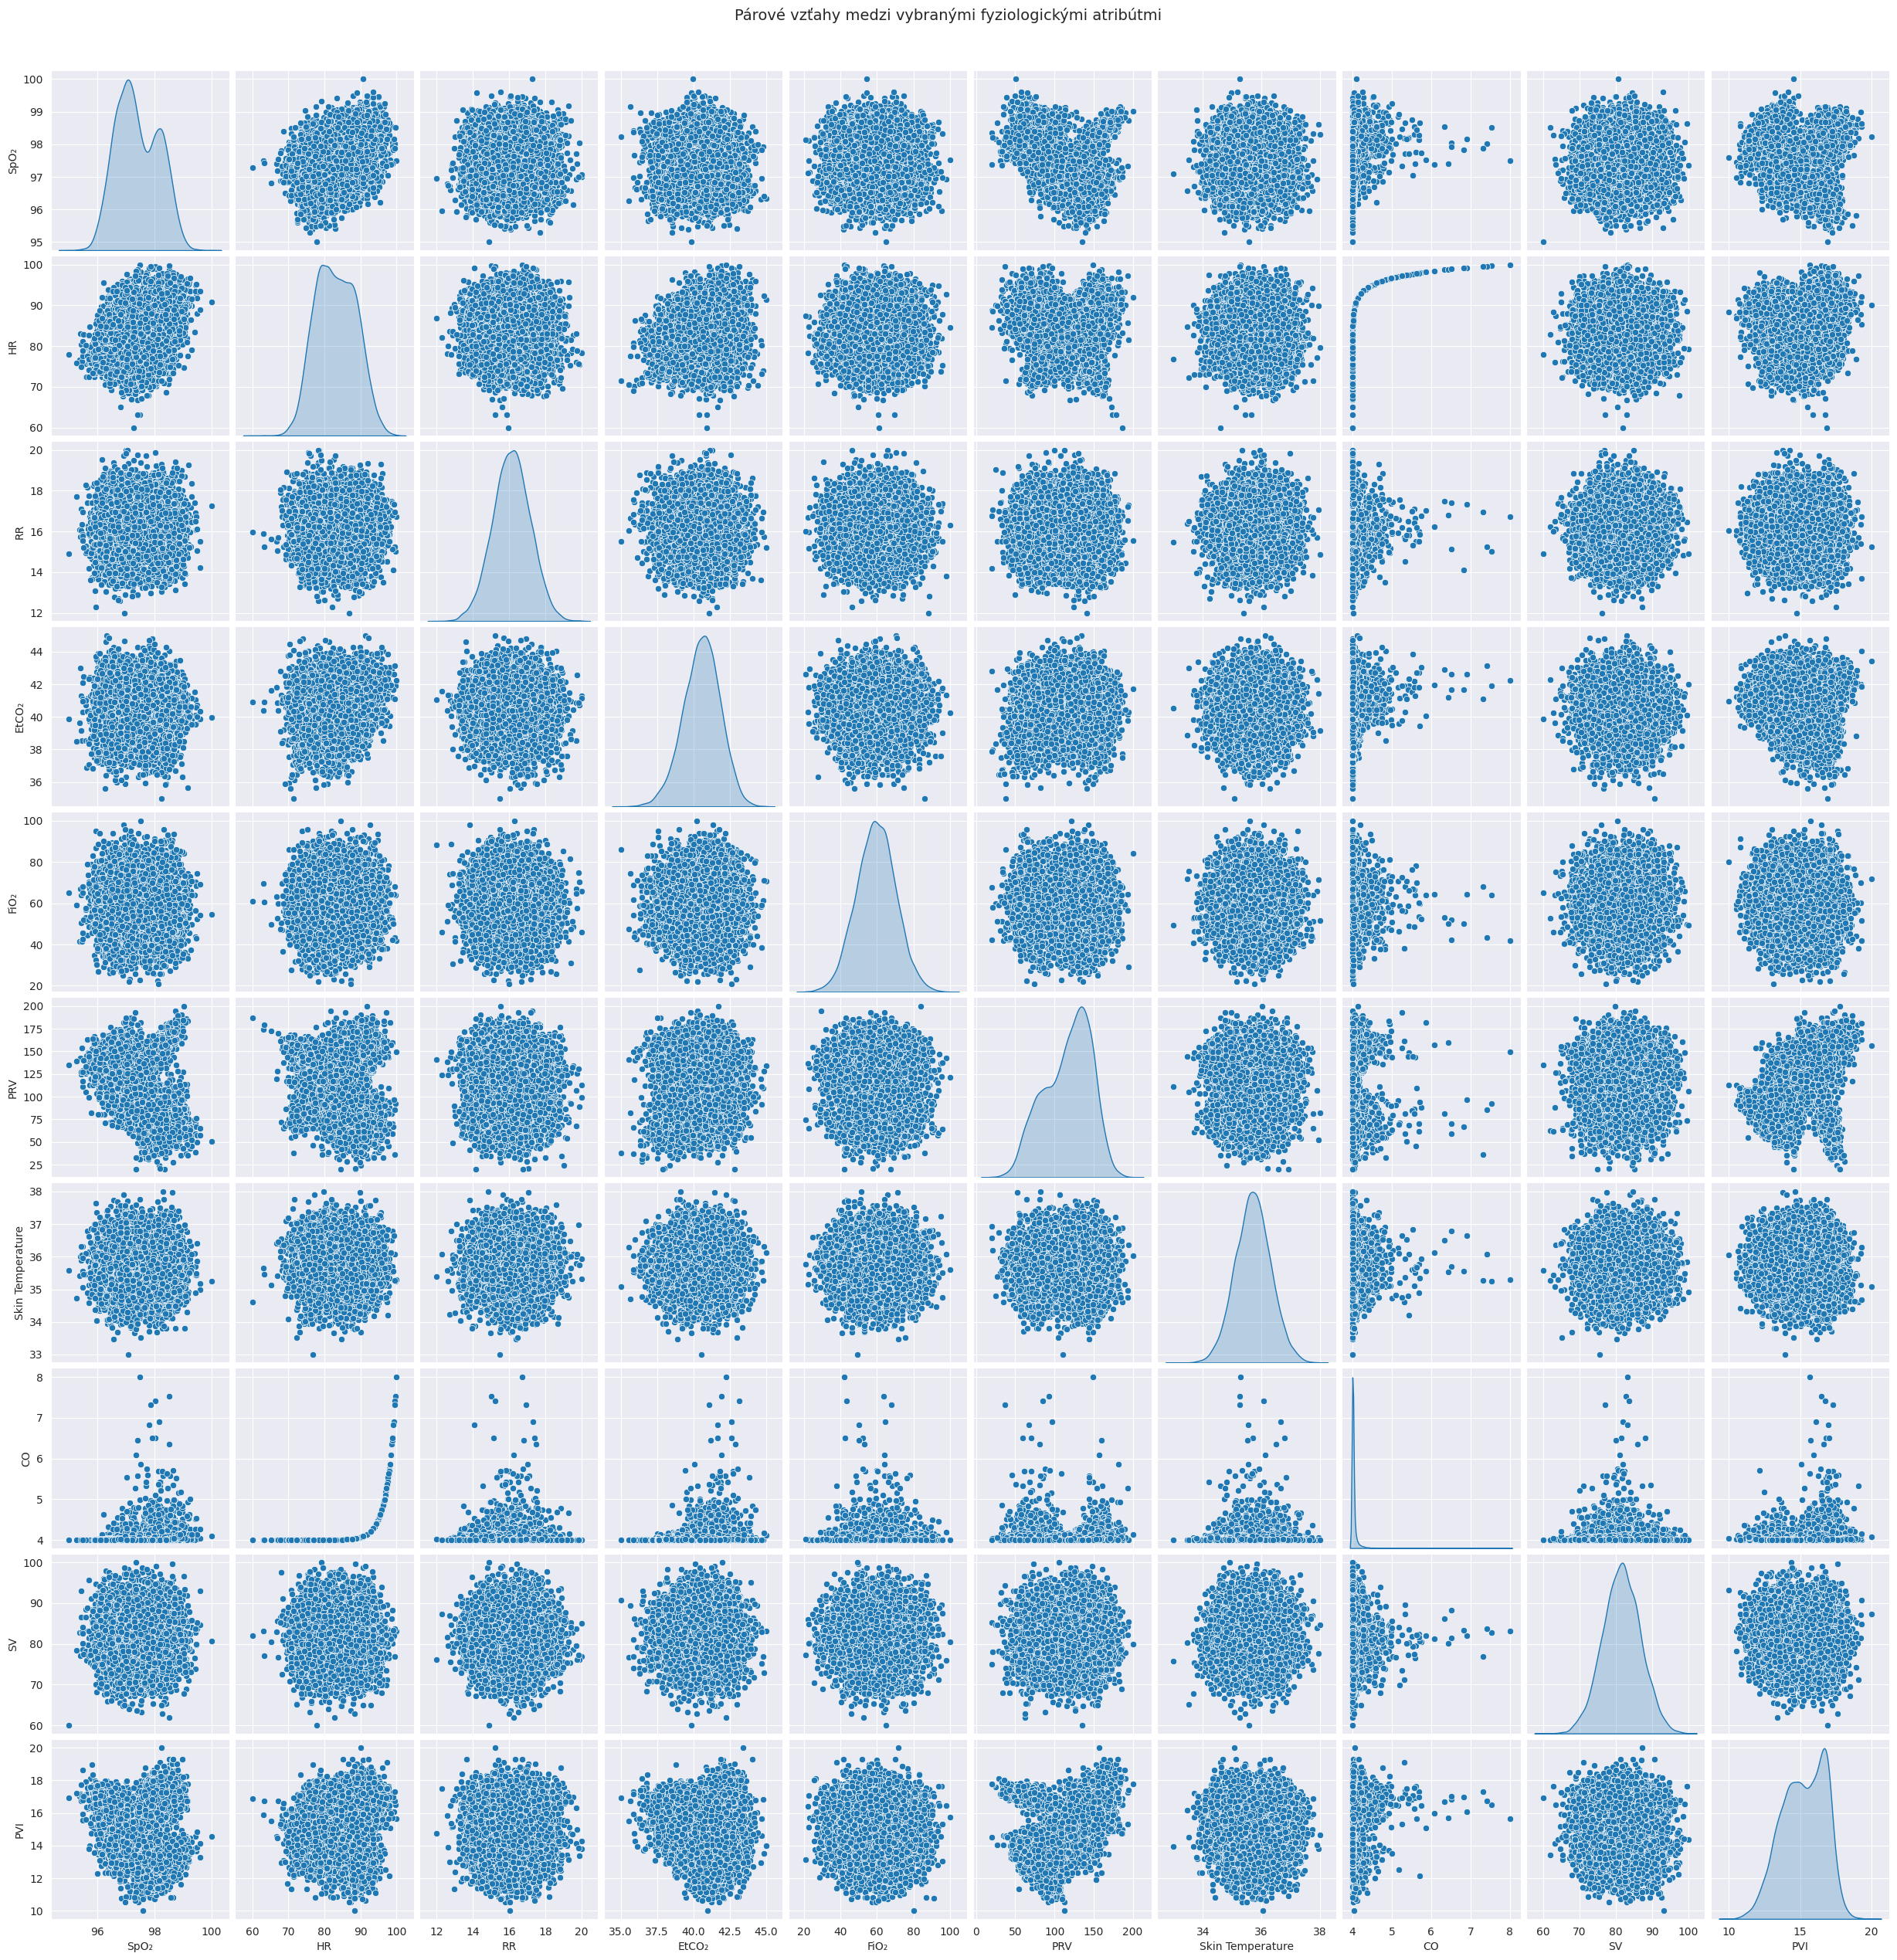

In [26]:
plt.rcParams['font.family'] = 'DejaVu Sans'

selected_cols = [
    'SpO₂', 'HR', 'RR', 'EtCO₂', 'FiO₂',
    'PRV', 'Skin Temperature', 'CO', 'SV', 'PVI'
]

corr_matrix = observation_df.corr(numeric_only=True)

sns.pairplot(
    observation_df[selected_cols],
    diag_kind="kde"
)
plt.suptitle("Párové vzťahy medzi vybranými fyziologickými atribútmi", y=1.02, fontsize=14)
plt.show()


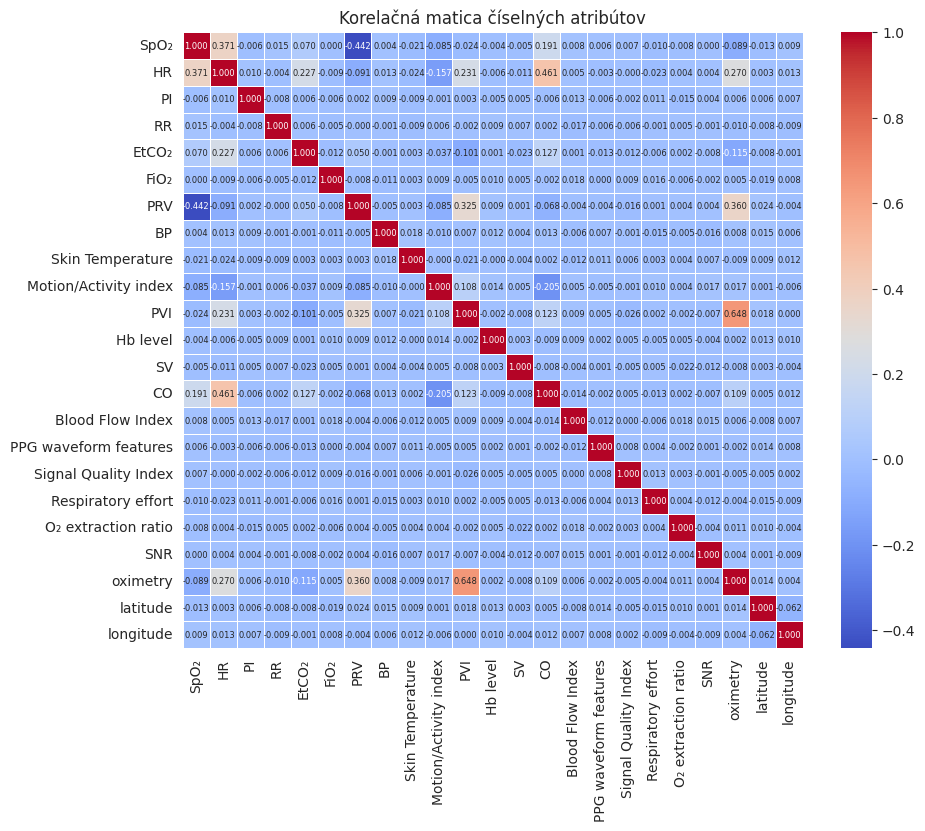

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".3f", annot_kws={"size": 6}, cmap="coolwarm", linewidths=0.5)
plt.title("Korelačná matica číselných atribútov")
plt.show()

In [28]:
expected_ranges = {
    'SpO₂': (95, 100),
    'HR': (60, 100),
    'RR': (12, 20),
    'EtCO₂': (35, 45),
    'FiO₂': (21, 100),
    'PRV': (20, 200),
    'Skin Temperature': (33, 38),
    'CO': (4, 8),
    'SV': (60, 100),
    'PVI': (10, 20)
}

results = []
for col, (low, high) in expected_ranges.items():
    data = observation_df[col].dropna()
    below = (data < low).sum()
    above = (data > high).sum()
    total = len(data)
    results.append({
        "Atribút": col,
        "Rozsah": f"{low}–{high}",
        "Pod rozsahom": below,
        "Nad rozsahom": above,
        "Spolu meraní": total,
        "OK (%)": round((total - below - above) / total * 100, 2) if total > 0 else 0
    })

check_df = pd.DataFrame(results)
display(check_df)

,Atribút,Rozsah,Pod rozsahom,Nad rozsahom,Spolu meraní,OK (%)
0,SpO₂,95–100,0,0,12133,100.0
1,HR,60–100,0,0,12133,100.0
2,RR,12–20,0,0,12133,100.0
3,EtCO₂,35–45,0,0,12133,100.0
4,FiO₂,21–100,0,0,12133,100.0
5,PRV,20–200,0,0,12133,100.0
6,Skin Temperature,33–38,0,0,12133,100.0
7,CO,4–8,0,0,12133,100.0
8,SV,60–100,0,0,12133,100.0
9,PVI,10–20,0,0,12133,100.0


In [29]:
corr = observation_df.corr()['oximetry'].sort_values(ascending=False)
print(corr)

oximetry                 1.000000
PVI                      0.647569
PRV                      0.360077
HR                       0.270072
CO                       0.109312
Motion/Activity index    0.016665
latitude                 0.014292
O₂ extraction ratio      0.011485
BP                       0.008303
PI                       0.006421
Blood Flow Index         0.005580
FiO₂                     0.004907
SNR                      0.004251
longitude                0.004003
Hb level                 0.002060
PPG waveform features   -0.001821
Respiratory effort      -0.004276
Signal Quality Index    -0.005339
SV                      -0.007693
Skin Temperature        -0.008894
RR                      -0.010002
SpO₂                    -0.088682
EtCO₂                   -0.115092
Name: oximetry, dtype: float64


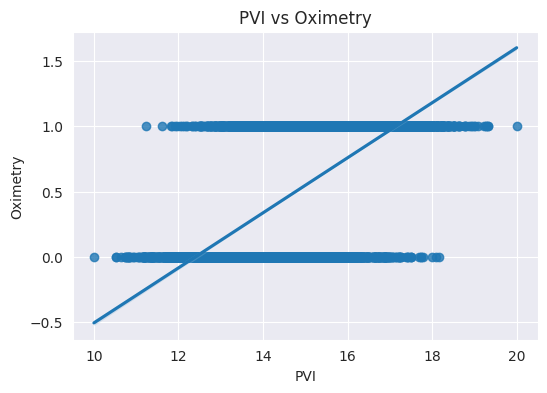

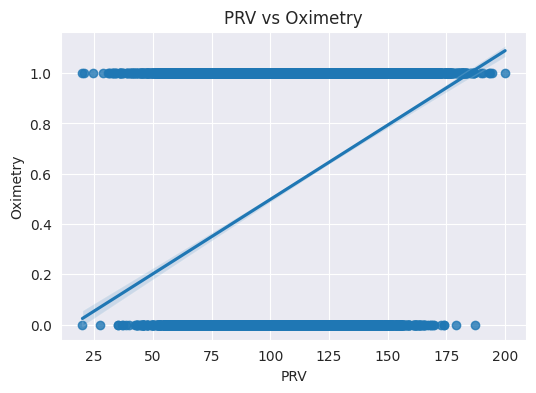

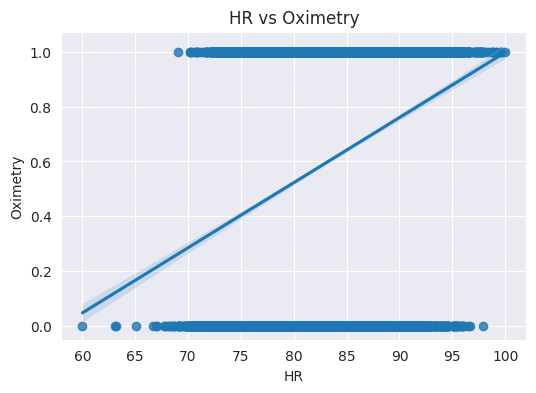

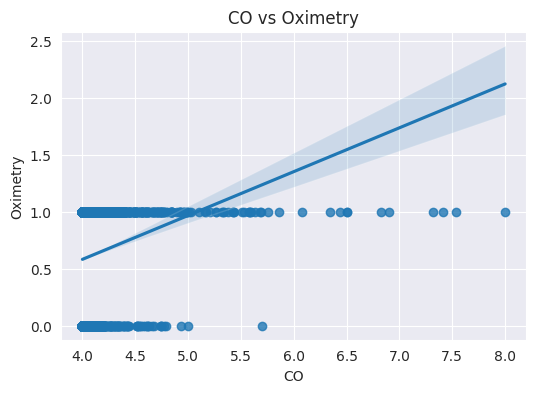

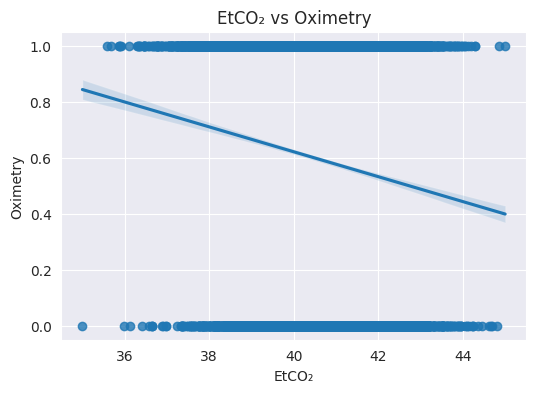

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


top_features = ['PVI', 'PRV', 'HR', 'CO', 'EtCO₂']

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=observation_df, x=feature, y='oximetry')
    plt.title(f'{feature} vs Oximetry')
    plt.xlabel(feature)
    plt.ylabel('Oximetry')
    plt.show()


# Cleaning

In [31]:
patient_df['address'] = patient_df['address'].str.replace('\n', ', ').str.replace('\r', '')
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024/06/13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,"10/11/2024, 00:00:00","Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,"10/19/2022, 00:00:00",島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019/01/19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019/11/10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [32]:
patient_df['registration'] = (
    patient_df['registration']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

patient_df['registration'] = pd.to_datetime(
    patient_df['registration'],
    errors='coerce',
    format='mixed'
)
patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,residence,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024-06-13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,NaN,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,2024-10-11,"Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,NaN,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,2022-10-19,島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,NaN,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019-01-19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,NaN,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019-11-10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,NaN,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [33]:
patient_df['residence'].unique()

array([nan])

In [34]:
patient_df = patient_df.drop(columns=['residence'])

patient_df.head()

,blood_group,user_id,company,registration,address,job,ssn,username,name,current_location,mail,station_ID
0,B-,1384,Wulf Heinz AG,2024-06-13,"Zänkerweg 6-2, 75317 Pößneck",NaN,079-86-6480,ilias32,Herr Pirmin Stadelmann B.A.,"(Decimal('-9.5081185'), Decimal('-108.465353'))",bruno18@gmx.de,289
1,O+,1398,Borges Moreira Ltda.,2024-10-11,"Fazenda Brenda Vieira, 51, Piratininga, 99724-...",NaN,84926073196,pedro-miguelvargas,Sr. Matheus Cirino,"(Decimal('38.5020005'), Decimal('151.185055'))",ana-beatrizpacheco@hotmail.com,326
2,B-,163,高橋建設有限会社,2022-10-19,島根県豊島区上高野24丁目16番6号,NaN,127-45-0018,skobayashi,中村 真綾,"(Decimal('87.3250985'), Decimal('-83.533367'))",vmaeda@yahoo.com,594
3,B+,112,Yang-Gray,2019-01-19,"93041 Wright Turnpike, Lake Loritown, RI 96307",NaN,765-77-3956,kochmario,Collin Wright,"(Decimal('-45.2256685'), Decimal('147.973684'))",reaton@yahoo.com,738
4,A+,92,Johnson Ltd,2019-11-10,"0089 William Run, West Adam, TX 90462",NaN,457-20-6978,paul10,Kristina Murray,"(Decimal('7.750758'), Decimal('71.027557'))",cameron61@hotmail.com,628


In [35]:
station_df[['continent', 'city']] = station_df['location'].str.rsplit('/', n=1, expand=True)
station_df = station_df.drop(columns=['location'])
station_df.head()

,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,17 Jun 2018,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022/10/10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016/11/06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022/09/10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,07 Jan 2024,Africa,Algiers


In [36]:
station_df['revision'] = (
    station_df['revision']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

station_df['revision'] = pd.to_datetime(
    station_df['revision'],
    errors='coerce',
    format='mixed'  
)
station_df.head()


,station,longitude,QoS,latitude,revision,continent,city
0,Kenda,86.51499,good,23.19590,2018-06-17,Asia,Kolkata
1,Canton,-83.48216,good,42.30865,2022-10-10,America,Detroit
2,Zaysan,84.87144,good,47.46657,2016-11-06,Asia,Almaty
3,Shushary,30.38167,good,59.80917,2022-09-10,Europe,Moscow
4,Cheraga,2.95924,good,36.76775,2024-01-07,Africa,Algiers
